In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
test_data_numeric = test_data.select_dtypes(include='number')
test_data_numeric.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


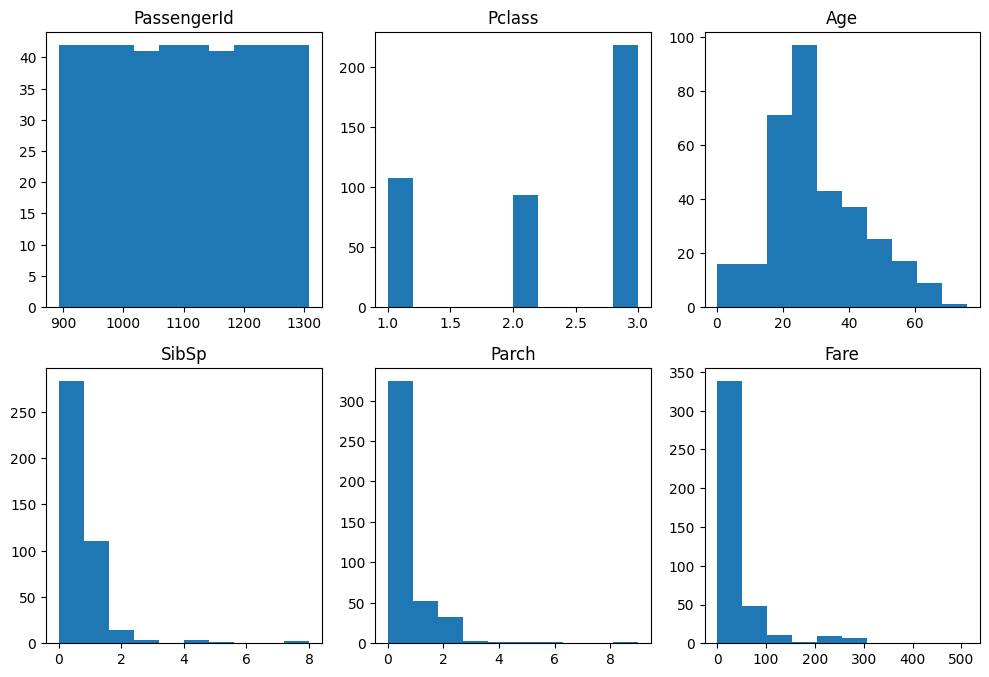

In [8]:
plt.figure(figsize=(10,10))
for i, col in enumerate(test_data_numeric.columns):
    plt.subplot(3, 3, i+1)
    plt.hist(test_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [13]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

# for categorial
test_data['Cabin'] = test_data['Cabin'].fillna(test_data['Cabin'].mode()[0])


In [14]:
test_data.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

##### Handling outliers
---

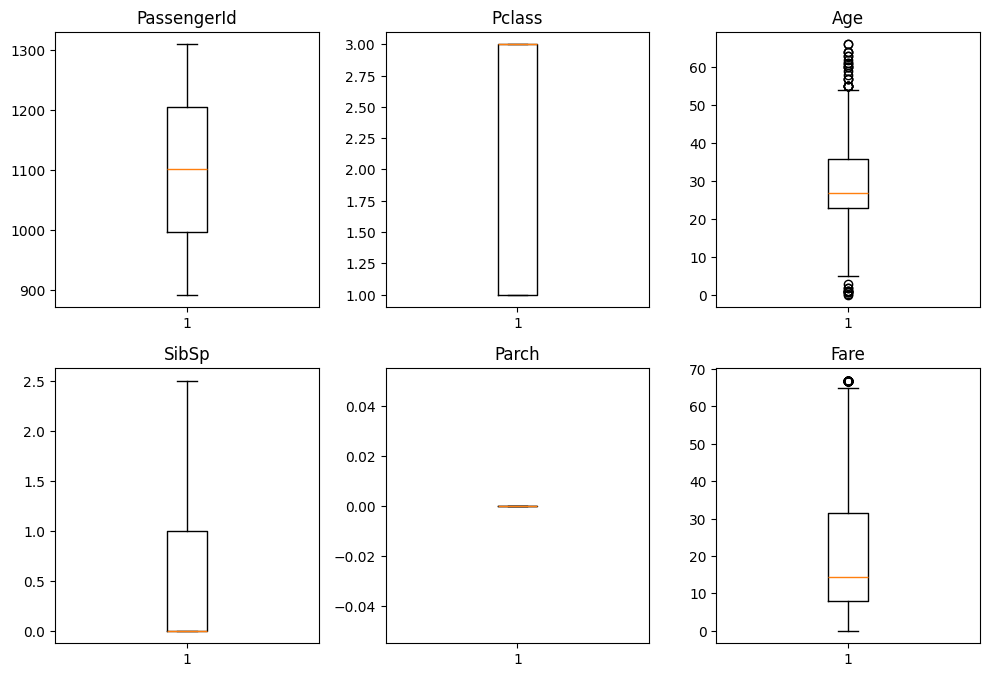

In [15]:
plt.figure(figsize=(10,10))
for i, col in enumerate(test_data_numeric.columns):
    plt.subplot(3, 3, i+1)
    plt.boxplot(test_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [17]:
def handling_outlier(columns):
    for i in columns:
        lower_quantile = test_data[i].quantile(.25)
        upper_quantile = test_data[i].quantile(.75)

        IQR = upper_quantile-lower_quantile
        
        lower_bound = lower_quantile-1.5*IQR
        upper_bound = upper_quantile+1.5*IQR

        test_data[i] = np.where(test_data[i]<lower_bound,lower_bound,test_data[i])
        test_data[i] = np.where(test_data[i]>upper_bound,upper_bound,test_data[i])
handling_outlier(test_data_numeric)

<Figure size 640x480 with 0 Axes>

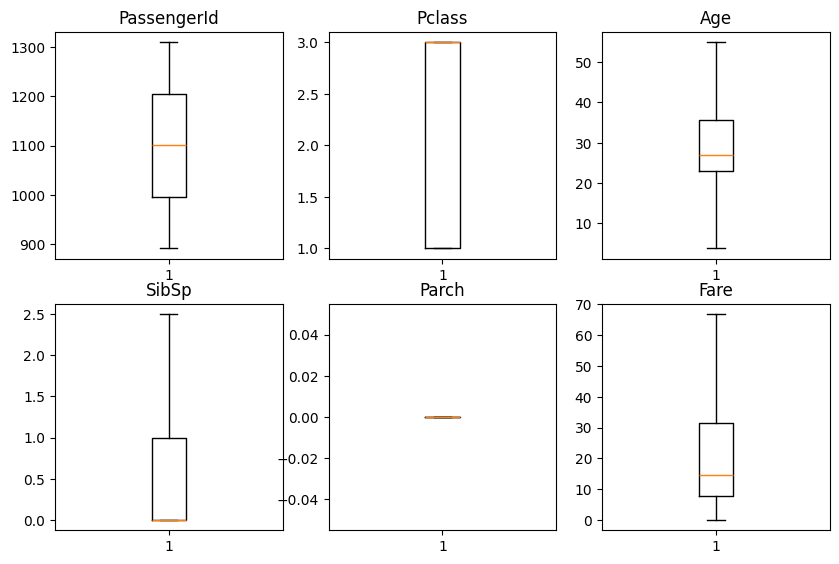

In [18]:
def plotting(test_data_numeric):
    plt.figure(figsize=(10,10))
    for i, col in enumerate(test_data_numeric.columns):
        plt.subplot(3, 3, i+1)
        plt.boxplot(test_data[col])
        plt.title(col)
plt.tight_layout() 
plt.show()
plotting(test_data_numeric)

In [21]:
sum(test_data.duplicated())

0

In [24]:
test_data = test_data.rename(columns={'sex':'Sex'})
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892.0,3.0,"Kelly, Mr. James",male,34.500,0.0,0.0,330911,7.8292,B57 B59 B63 B66,Q
1,893.0,3.0,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1.0,0.0,363272,7.0000,B57 B59 B63 B66,S
2,894.0,2.0,"Myles, Mr. Thomas Francis",male,54.875,0.0,0.0,240276,9.6875,B57 B59 B63 B66,Q
3,895.0,3.0,"Wirz, Mr. Albert",male,27.000,0.0,0.0,315154,8.6625,B57 B59 B63 B66,S
4,896.0,3.0,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1.0,0.0,3101298,12.2875,B57 B59 B63 B66,S


##### Relationships
--- 

##### univariate

<Axes: xlabel='Age', ylabel='Count'>

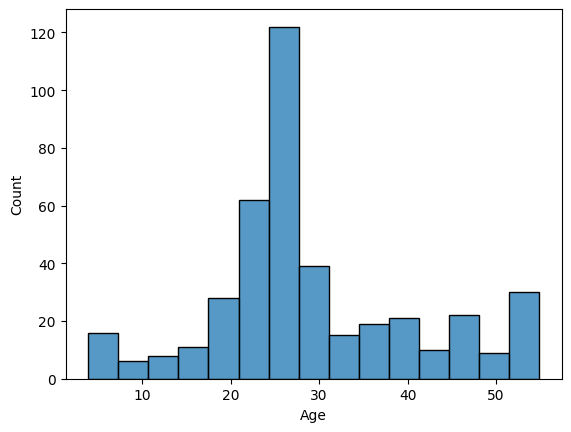

In [12]:
sns.histplot(data=test_data,x='Age')

<Axes: xlabel='Sex', ylabel='count'>

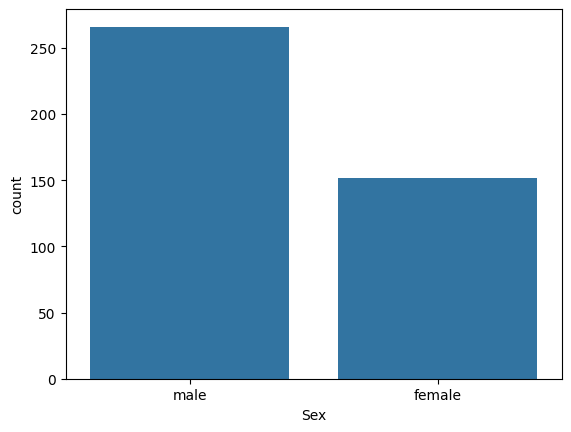

In [14]:
sns.countplot(data=test_data, x='Sex')

##### Bivariate

<Axes: xlabel='SibSp', ylabel='Fare'>

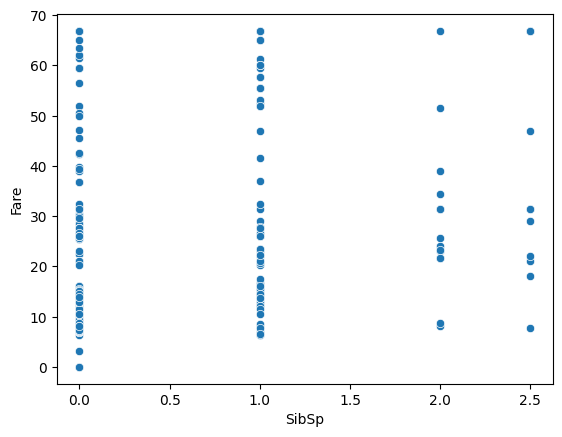

In [45]:
sns.scatterplot(data=test_data,x='SibSp',y='Fare')

<Axes: xlabel='Sex', ylabel='count'>

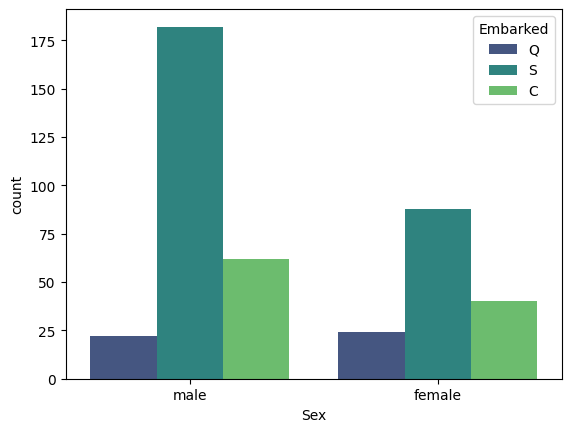

In [33]:
sns.countplot(data=test_data, x='Sex', hue='Embarked', palette='viridis')

<Axes: xlabel='Sex', ylabel='Age'>

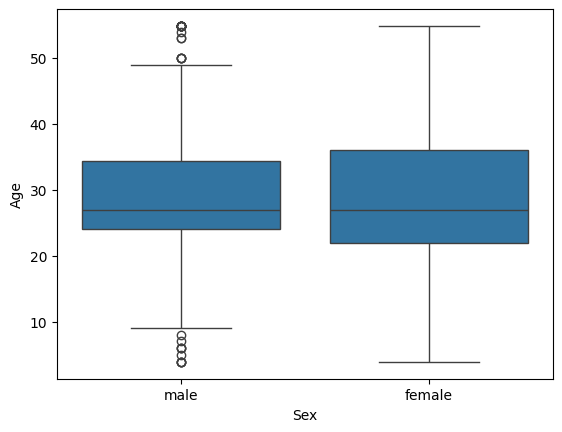

In [35]:
sns.boxplot(data=test_data,x='Sex',y='Age')

##### Multivariate

<Axes: >

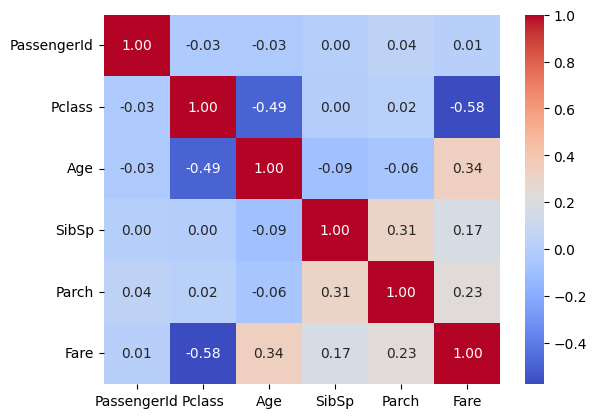

In [ ]:
corr = test_data_numeric.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")


In [29]:
# Pearson Correlation (default method)
pearson_corr = test_data_numeric.corr(method='pearson')

# Spearman Correlation
spearman_corr = test_data_numeric.corr(method='spearman')

# Display correlation matrices
print("Pearson Correlation:\n", pearson_corr)
print("\nSpearman Correlation:\n", spearman_corr)


Pearson Correlation:
              PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.026751 -0.034102  0.003818  0.043080  0.008211
Pclass         -0.026751  1.000000 -0.492143  0.001087  0.018721 -0.577147
Age            -0.034102 -0.492143  1.000000 -0.091587 -0.061249  0.337932
SibSp           0.003818  0.001087 -0.091587  1.000000  0.306895  0.171539
Parch           0.043080  0.018721 -0.061249  0.306895  1.000000  0.230046
Fare            0.008211 -0.577147  0.337932  0.171539  0.230046  1.000000

Spearman Correlation:
              PassengerId    Pclass       Age     SibSp     Parch      Fare
PassengerId     1.000000 -0.034246 -0.018897 -0.010179  0.050692  0.020174
Pclass         -0.034246  1.000000 -0.471535 -0.118701 -0.043345 -0.753744
Age            -0.018897 -0.471535  1.000000 -0.015126 -0.130408  0.315220
SibSp          -0.010179 -0.118701 -0.015126  1.000000  0.412449  0.441343
Parch           0.050692 -0.043345 -0.130408  0.412449

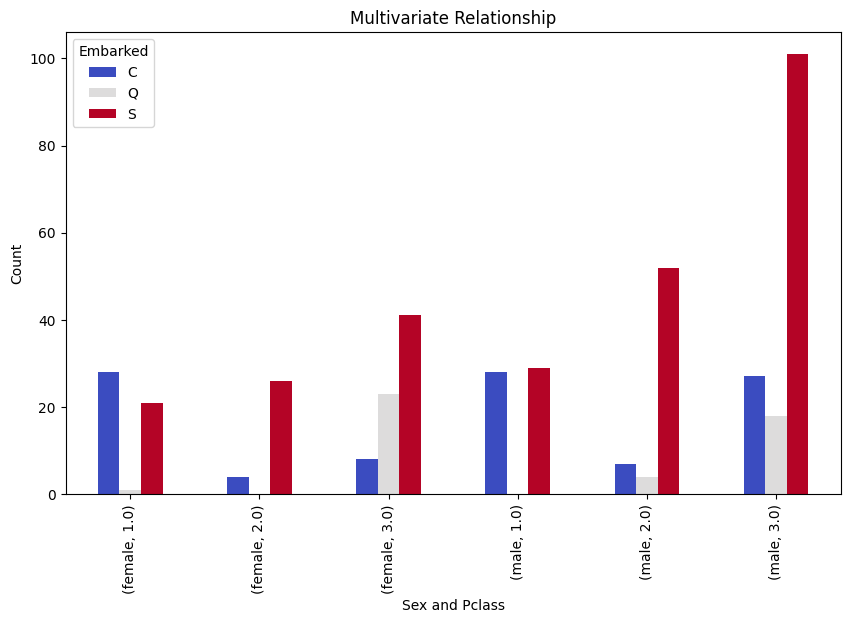

In [ ]:


contingency_table = pd.crosstab(index=[test_data['Sex'], test_data['Pclass']], columns=test_data['Embarked'])
contingency_table.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')

plt.title("Multivariate Relationship")
plt.ylabel("Count")
plt.xlabel("Sex and Pclass")
plt.legend(title="Embarked")
plt.show()
